## Autoreload

Autoreload allows the notebook to dynamically load code: if we update some helper functions *outside* of the notebook, we do not need to reload the notebook.

In [396]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Libraries

We will use several Python modules, which you can find here.

|                    | Library        | Version  | Reference                                                                       |
| ------------------ | -------------- | -------- | ------------------------------------------------------------------------------- |
| Data handling      | `pandas`       | `2.2.2`  | [pydata](https://pandas.pydata.org/docs/reference/index.html)                   |
| Data visualization | `seaborn`      | `0.13.2` | [pydata](https://seaborn.pydata.org/index.html)                                 |
| Data processing    | `scikit-learn` | `1.5.1`  | [scikit-learn](https://scikit-learn.org/stable/api/index.html)                  | 
| Numpy              | `numpy`        | `2.0.1`  | [numpy](https://numpy.org/doc/stable/reference/index.html#reference)            | 
| Datasets           | `datasets`     | `2.20.0` | [datasets](https://huggingface.co/docs/datasets/package_reference/main_classes) | 


**`pandas`**

The basic object is a `pandas.DataFrame`, a table-like object storing datasets.

**`datasets`**

Library to programmatically interact with the [Huggingface datasets hub](https://huggingface.co/datasets).

**`numpy`**

The basic object is a `numpy.ndarray`, a multi-dimensional array storing objects.

**`scikit-learn`**

Everything data manipulation, and more.

**`seaborn`**

Data visualization.

---

In [397]:
# All auxiliary code is in ../src

import sys

sys.path.append("../src/")

# Pandas and Numpy
`pandas` is a `python` module that allows us to play with data in a tabular format.
Data is stored in an object of type `DataFrame` (reference [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)) which allows us to group records together, each record having a set of attributes.
Access is slightly different from classic `list`s:
- `dataframe.iloc[]` replaces the `list[]`
- `dataframe[column]` allows us to access features, i.e., columns, of a record. Multiple columns can also be accessed at once by using a `list` in place of `column`.



In [398]:
from datasets import load_dataset

# load dataset at https://huggingface.co/datasets/mstz/adult, configuration "income", on the train split, then convert it to a pandas dataframe
dataset = load_dataset("mstz/adult", "income")["train"].to_pandas()
dataset.head()

,age,capital_gain,capital_loss,education,final_weight,hours_worked_per_week,marital_status,native_country,occupation,race,relationship,is_male,workclass,over_threshold
0,43,0.0,0.0,10,34278,35,Married-civ-spouse,United-States,Sales,White,Husband,True,Private,0
1,23,0.0,0.0,3,244698,35,Never-married,Mexico,Farming-fishing,White,Other-relative,True,Private,0
2,39,0.0,0.0,10,118286,40,Married-civ-spouse,United-States,Sales,Black,Husband,True,Private,0
3,35,0.0,0.0,9,126675,46,Divorced,?,Craft-repair,White,Not-in-family,True,Private,0
4,66,0.0,0.0,13,28367,99,Married-civ-spouse,United-States,Priv-house-serv,White,Other-relative,True,Private,0


In [399]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36631 entries, 0 to 36630
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    36631 non-null  int64  
 1   capital_gain           36631 non-null  float64
 2   capital_loss           36631 non-null  float64
 3   education              36631 non-null  int8   
 4   final_weight           36631 non-null  int64  
 5   hours_worked_per_week  36631 non-null  int64  
 6   marital_status         36631 non-null  object 
 7   native_country         36631 non-null  object 
 8   occupation             36631 non-null  object 
 9   race                   36631 non-null  object 
 10  relationship           36631 non-null  object 
 11  is_male                36631 non-null  bool   
 12  workclass              36631 non-null  object 
 13  over_threshold         36631 non-null  int64  
dtypes: bool(1), float64(2), int64(4), int8(1), object(6)
m

In [400]:
dataset.dtypes

age                        int64
capital_gain             float64
capital_loss             float64
education                   int8
final_weight               int64
hours_worked_per_week      int64
marital_status            object
native_country            object
occupation                object
race                      object
relationship              object
is_male                     bool
workclass                 object
over_threshold             int64
dtype: object

We can also filter in/out features according to their type.
Reference [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html).

In [340]:
dataset.select_dtypes(include="number")

,age,capital_gain,capital_loss,education,final_weight,hours_worked_per_week,over_threshold
0,43,0.0,0.0,10,34278,35,0
1,23,0.0,0.0,3,244698,35,0
2,39,0.0,0.0,10,118286,40,0
3,35,0.0,0.0,9,126675,46,0
4,66,0.0,0.0,13,28367,99,0
...,...,...,...,...,...,...,...
36626,40,0.0,0.0,10,279679,45,0
36627,40,0.0,0.0,10,323790,40,0
36628,38,0.0,0.0,10,78247,40,0
36629,53,0.0,0.0,14,92565,40,1


In [341]:
dataset.select_dtypes(exclude="number")

,marital_status,native_country,occupation,race,relationship,is_male,workclass
0,Married-civ-spouse,United-States,Sales,White,Husband,True,Private
1,Never-married,Mexico,Farming-fishing,White,Other-relative,True,Private
2,Married-civ-spouse,United-States,Sales,Black,Husband,True,Private
3,Divorced,?,Craft-repair,White,Not-in-family,True,Private
4,Married-civ-spouse,United-States,Priv-house-serv,White,Other-relative,True,Private
...,...,...,...,...,...,...,...
36626,Divorced,United-States,Exec-managerial,White,Not-in-family,True,Private
36627,Married-civ-spouse,United-States,Other-service,White,Husband,True,Private
36628,Married-civ-spouse,United-States,Exec-managerial,White,Husband,True,Private
36629,Married-civ-spouse,United-States,Prof-specialty,Asian-Pac-Islander,Husband,True,Private


In [342]:
dataset.shape

(36631, 14)

### Searching
DataFrames can be filtered down through `selectors`.
A `selector` is a boolean sequence filtering down rows.

In [343]:
dataset[dataset["age"] == 43]

,age,capital_gain,capital_loss,education,final_weight,hours_worked_per_week,marital_status,native_country,occupation,race,relationship,is_male,workclass,over_threshold
0,43,0.0,0.0,10,34278,35,Married-civ-spouse,United-States,Sales,White,Husband,True,Private,0
11,43,0.0,0.0,10,83756,50,Never-married,United-States,Exec-managerial,White,Unmarried,True,Private,0
48,43,0.0,0.0,13,144778,55,Married-civ-spouse,Italy,Prof-specialty,White,Husband,True,Private,1
50,43,0.0,0.0,9,270522,26,Separated,United-States,Other-service,White,Not-in-family,False,Private,0
94,43,0.0,0.0,9,245487,40,Married-civ-spouse,Mexico,Craft-repair,Other,Husband,True,Private,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36372,43,0.0,0.0,9,200734,40,Separated,United-States,Other-service,Black,Not-in-family,False,Private,0
36401,43,0.0,0.0,10,193882,50,Married-civ-spouse,United-States,Transport-moving,White,Husband,True,Private,0
36481,43,0.0,0.0,10,282069,42,Divorced,United-States,Craft-repair,White,Unmarried,True,Private,0
36522,43,0.0,0.0,9,170230,40,Separated,United-States,Adm-clerical,White,Unmarried,False,Private,0


### ...and adding

In [344]:
dataset.loc[dataset.age < 21, "can_drink"] = False
dataset.loc[dataset.age >= 21, "can_drink"] = True
dataset.head()

,age,capital_gain,capital_loss,education,final_weight,hours_worked_per_week,marital_status,native_country,occupation,race,relationship,is_male,workclass,over_threshold,can_drink
0,43,0.0,0.0,10,34278,35,Married-civ-spouse,United-States,Sales,White,Husband,True,Private,0,True
1,23,0.0,0.0,3,244698,35,Never-married,Mexico,Farming-fishing,White,Other-relative,True,Private,0,True
2,39,0.0,0.0,10,118286,40,Married-civ-spouse,United-States,Sales,Black,Husband,True,Private,0,True
3,35,0.0,0.0,9,126675,46,Divorced,?,Craft-repair,White,Not-in-family,True,Private,0,True
4,66,0.0,0.0,13,28367,99,Married-civ-spouse,United-States,Priv-house-serv,White,Other-relative,True,Private,0,True


### Datasets at a glance

In [345]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36631 entries, 0 to 36630
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    36631 non-null  int64  
 1   capital_gain           36631 non-null  float64
 2   capital_loss           36631 non-null  float64
 3   education              36631 non-null  int8   
 4   final_weight           36631 non-null  int64  
 5   hours_worked_per_week  36631 non-null  int64  
 6   marital_status         36631 non-null  object 
 7   native_country         36631 non-null  object 
 8   occupation             36631 non-null  object 
 9   race                   36631 non-null  object 
 10  relationship           36631 non-null  object 
 11  is_male                36631 non-null  bool   
 12  workclass              36631 non-null  object 
 13  over_threshold         36631 non-null  int64  
 14  can_drink              36631 non-null  object 
dtypes:

[Reference](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe)

In [346]:
dataset.describe()

,age,capital_gain,capital_loss,education,final_weight,hours_worked_per_week,over_threshold
count,36631.000000,36631.000000,36631.000000,36631.000000,3.663100e+04,36631.000000,36631.000000
mean,38.663946,1091.783244,85.905108,10.079004,1.898852e+05,40.424449,0.239278
std,13.731151,7524.390241,399.974900,2.565630,1.058737e+05,12.394869,0.426649
min,17.000000,0.000000,0.000000,1.000000,1.228500e+04,1.000000,0.000000
25%,28.000000,0.000000,0.000000,9.000000,1.177890e+05,40.000000,0.000000
50%,37.000000,0.000000,0.000000,10.000000,1.782820e+05,40.000000,0.000000
75%,48.000000,0.000000,0.000000,12.000000,2.373190e+05,45.000000,0.000000
max,90.000000,99999.000000,4356.000000,16.000000,1.490400e+06,99.000000,1.000000


We can also create custom functions aggregating datasets ([reference](https://pandas.pydata.org/docs/user_guide/basics.html#custom-describe)).

You can find a host of example datasets to play with at [huggingface.co/mstz](https://huggingface.co/mstz).

### Dataset filtering
We can filter the dataset to only retain some of its records and/or features.

In [347]:
dataset[["age", "capital_gain", "capital_loss"]]

,age,capital_gain,capital_loss
0,43,0.0,0.0
1,23,0.0,0.0
2,39,0.0,0.0
3,35,0.0,0.0
4,66,0.0,0.0
...,...,...,...
36626,40,0.0,0.0
36627,40,0.0,0.0
36628,38,0.0,0.0
36629,53,0.0,0.0


...and these can be chained!

In [348]:
dataset[["age", "capital_gain", "capital_loss"]]["age"]

0        43
1        23
2        39
3        35
4        66
         ..
36626    40
36627    40
36628    38
36629    53
36630    36
Name: age, Length: 36631, dtype: int64

We can also filter out duplicate records. [Reference](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html).

In [349]:
dup_df = dataset[dataset.duplicated(keep=False)]
dup_df.head()

,age,capital_gain,capital_loss,education,final_weight,hours_worked_per_week,marital_status,native_country,occupation,race,relationship,is_male,workclass,over_threshold,can_drink
613,23,0.0,0.0,13,250630,40,Never-married,United-States,Sales,White,Not-in-family,False,Private,0,True
809,20,0.0,0.0,10,203353,40,Never-married,United-States,?,White,Own-child,False,?,0,False
1172,30,0.0,0.0,9,111567,48,Never-married,United-States,Craft-repair,White,Own-child,True,Private,0,True
2027,17,0.0,0.0,8,153021,20,Never-married,United-States,Sales,White,Own-child,False,Private,0,False
2196,45,0.0,0.0,13,82797,45,Married-civ-spouse,United-States,Exec-managerial,White,Husband,True,Private,1,True


In [350]:
dup_df.iloc[[1,5]]

,age,capital_gain,capital_loss,education,final_weight,hours_worked_per_week,marital_status,native_country,occupation,race,relationship,is_male,workclass,over_threshold,can_drink
809,20,0.0,0.0,10,203353,40,Never-married,United-States,?,White,Own-child,False,?,0,False
2461,20,0.0,0.0,10,203353,40,Never-married,United-States,?,White,Own-child,False,?,0,False


In [351]:
dataset = dataset.drop_duplicates()

In [352]:
dataset.isnull().sum()

age                      0
capital_gain             0
capital_loss             0
education                0
final_weight             0
hours_worked_per_week    0
marital_status           0
native_country           0
occupation               0
race                     0
relationship             0
is_male                  0
workclass                0
over_threshold           0
can_drink                0
dtype: int64

Or simply filter out records with missing values.

In [353]:
dataset[dataset.isnull().any(axis=1)]

,age,capital_gain,capital_loss,education,final_weight,hours_worked_per_week,marital_status,native_country,occupation,race,relationship,is_male,workclass,over_threshold,can_drink


In [354]:
dataset = dataset.dropna()

---

# Missing values and imputations
Dataframes allow for missing values by using the special value `nan` (Not A Number), which we can detect through:
```python
dataset.isna()
```

To showcase some imputations, let us add some missing values.

In [355]:
import numpy

from transformations.values import remove_from_columns


dataset = load_dataset("mstz/adult", "income")["train"].to_pandas()
dataset_with_missing_values = remove_from_columns(dataset, ["age", "marital_status"], size_per_axis=0.1, strategy="random", replacing_value=numpy.nan)

missing_ages = numpy.argwhere(dataset_with_missing_values["age"].isna()).squeeze()
missing_marital_statuses = numpy.argwhere(dataset_with_missing_values["marital_status"].isna()).squeeze()

In [356]:
dataset_with_missing_values.isnull().sum()

age                      3663
capital_gain                0
capital_loss                0
education                   0
final_weight                0
hours_worked_per_week       0
marital_status           3663
native_country              0
occupation                  0
race                        0
relationship                0
is_male                     0
workclass                   0
over_threshold              0
dtype: int64

In [357]:
dataset_with_missing_values[dataset_with_missing_values.isnull().any(axis=1)]

,age,capital_gain,capital_loss,education,final_weight,hours_worked_per_week,marital_status,native_country,occupation,race,relationship,is_male,workclass,over_threshold
10,53.0,0.0,0.0,8,257126,45,NaN,United-States,Craft-repair,White,Husband,True,Self-emp-not-inc,0
14,NaN,27828.0,0.0,14,109133,60,Separated,Iran,Exec-managerial,White,Not-in-family,True,Private,1
17,47.0,0.0,0.0,14,202812,40,NaN,?,Prof-specialty,White,Husband,True,Private,1
18,NaN,0.0,0.0,9,367533,40,Divorced,United-States,Craft-repair,White,Not-in-family,True,Private,0
31,22.0,0.0,0.0,10,113936,40,NaN,United-States,Handlers-cleaners,White,Own-child,True,Private,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36609,45.0,0.0,0.0,9,213620,40,NaN,United-States,Other-service,White,Own-child,False,Private,0
36610,30.0,0.0,0.0,4,251120,38,NaN,United-States,Craft-repair,White,Not-in-family,True,Private,0
36616,NaN,0.0,0.0,10,176185,60,Married-spouse-absent,United-States,Craft-repair,White,Own-child,True,Self-emp-not-inc,1
36617,NaN,0.0,0.0,10,109273,38,NaN,United-States,Craft-repair,White,Not-in-family,True,Private,0


### Imputations
Imputation is a technique with which we "fill-in" the missing values according to the distribution of the data.
They can be guided by domain knowledge or computed:
- statistical imputation: missing value of the feature is replaced with the a dataset-related statistic, e.g., mean, mode
- neighbor imputation: missing value of the feature is replaced according to the values of similar instances

Imputation can introduce noise in your data: use with **extreme** care!

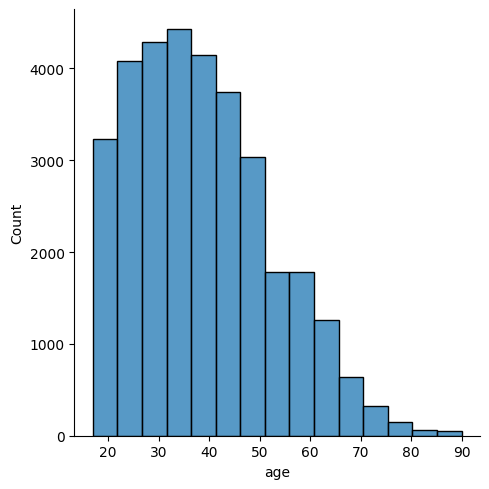

In [358]:
seaborn.displot(dataset_with_missing_values, 
                x="age", 
                kind="hist",
                row_order="desc",
                bins=15)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Married-civ-spouse'),
  Text(1, 0, 'Never-married'),
  Text(2, 0, 'Divorced'),
  Text(3, 0, 'Separated'),
  Text(4, 0, 'Married-spouse-absent'),
  Text(5, 0, 'Widowed'),
  Text(6, 0, 'Married-AF-spouse')])

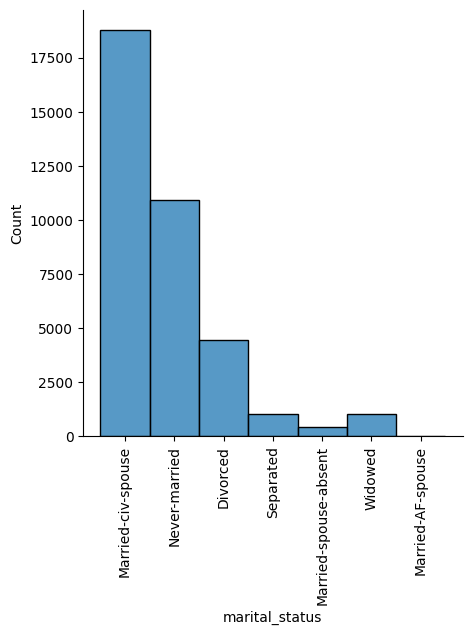

In [369]:
g = seaborn.displot(dataset_with_missing_values, 
                x="marital_status", 
                kind="hist",
                row_order="desc",
                bins=len(dataset_with_missing_values['marital_status'].unique()))
plt.xticks(rotation=90)

In [360]:
import numpy
from sklearn.impute import SimpleImputer

In [361]:
imputer = SimpleImputer(strategy="mean")

imputer.fit(dataset_with_missing_values[["age"]])

dataset_with_missing_values["age"] = imputer.transform(dataset_with_missing_values[["age"]]).squeeze()

In [362]:
dataset_with_missing_values.isnull().sum()

age                         0
capital_gain                0
capital_loss                0
education                   0
final_weight                0
hours_worked_per_week       0
marital_status           3663
native_country              0
occupation                  0
race                        0
relationship                0
is_male                     0
workclass                   0
over_threshold              0
dtype: int64

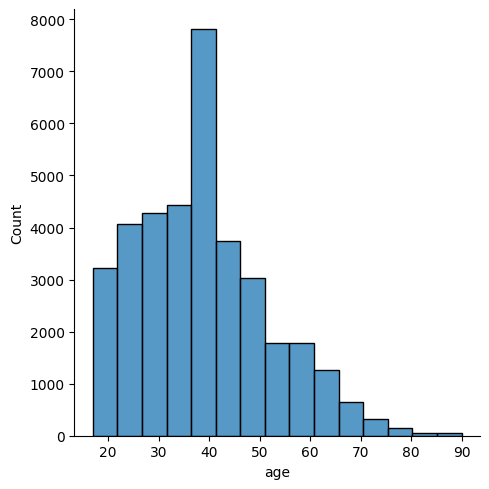

In [363]:
seaborn.displot(dataset_with_missing_values, 
                x="age", 
                kind="hist",
                row_order="desc",
                bins=15)

In [364]:
imputer = SimpleImputer(strategy="most_frequent")

imputer.fit(dataset_with_missing_values[["marital_status"]])

dataset_with_missing_values["marital_status"] = imputer.transform(dataset_with_missing_values[["marital_status"]]).squeeze()

In [365]:
dataset_with_missing_values.isnull().sum()

age                      0
capital_gain             0
capital_loss             0
education                0
final_weight             0
hours_worked_per_week    0
marital_status           0
native_country           0
occupation               0
race                     0
relationship             0
is_male                  0
workclass                0
over_threshold           0
dtype: int64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Married-civ-spouse'),
  Text(1, 0, 'Never-married'),
  Text(2, 0, 'Divorced'),
  Text(3, 0, 'Separated'),
  Text(4, 0, 'Married-spouse-absent'),
  Text(5, 0, 'Widowed'),
  Text(6, 0, 'Married-AF-spouse')])

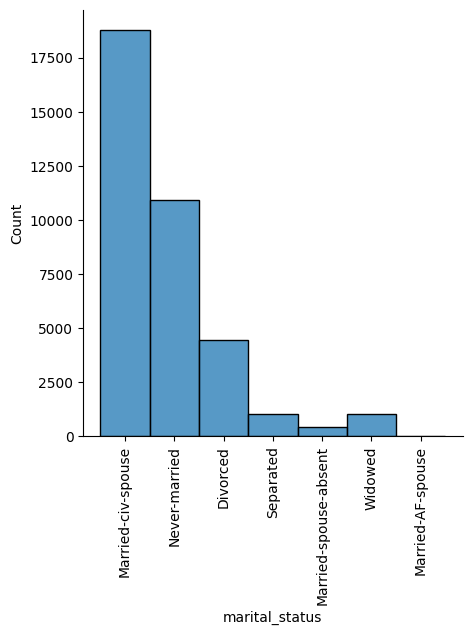

In [368]:
seaborn.displot(dataset_with_missing_values, 
                x="marital_status", 
                kind="hist",
                row_order="desc",
                bins=len(dataset_with_missing_values['marital_status'].unique()))
plt.xticks(rotation=90)

In [370]:
from sklearn.impute import KNNImputer


dataset = load_dataset("mstz/adult", "income")["train"].to_pandas()

# creating artificial missing values
auxiliary_columns = ["capital_gain", "capital_loss"]

imputer = KNNImputer(n_neighbors=2,weights="distance")
imputer.fit(dataset[["age"] + auxiliary_columns])
imputer.transform(dataset_with_missing_values[["age"] + auxiliary_columns])[missing_ages, 0]

array([38.63464572, 38.63464572, 38.63464572, ..., 38.63464572,
       38.63464572, 38.63464572])

---

# Shape of the data

Correlations and distributions.

### Correlations

In [371]:
from dataunderstanding import correlations
from transformations import center_and_scale, drop_boolean

dataset = load_dataset("mstz/adult", "income")["train"].to_pandas()
dataset['over_threshold'] = dataset['over_threshold'].astype(bool)
normalized_dataset, normalization_scalers_dataset = center_and_scale(dataset)
correlations = correlations(normalized_dataset)
correlations

,age,capital_gain,capital_loss,education,final_weight,hours_worked_per_week,correlation_type
age,1.000000,0.097903,0.048205,0.050158,-0.051930,0.112527,kendall
capital_gain,0.097903,1.000000,-0.063788,0.104596,-0.007354,0.080237,kendall
capital_loss,0.048205,-0.063788,1.000000,0.066344,0.000528,0.051299,kendall
education,0.050158,0.104596,0.066344,1.000000,-0.021190,0.128574,kendall
final_weight,-0.051930,-0.007354,0.000528,-0.021190,1.000000,-0.011863,kendall
hours_worked_per_week,0.112527,0.080237,0.051299,0.128574,-0.011863,1.000000,kendall
age,1.000000,0.074064,0.058779,0.030632,-0.076558,0.074441,pearson
capital_gain,0.074064,1.000000,-0.031165,0.124874,-0.003789,0.080314,pearson
capital_loss,0.058779,-0.031165,1.000000,0.079372,-0.002491,0.052106,pearson
education,0.030632,0.124874,0.079372,1.000000,-0.039205,0.143145,pearson


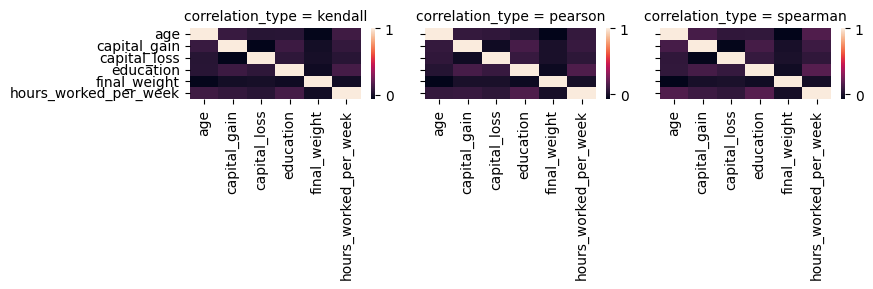

In [372]:
import seaborn

g = seaborn.FacetGrid(correlations, col="correlation_type")
g.map_dataframe(lambda data, color: seaborn.heatmap(data[data.columns[:-1]]))

<Axes: >

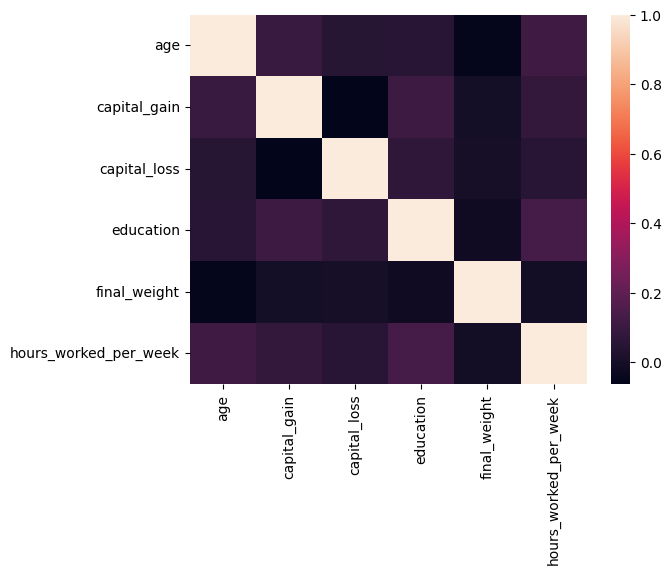

In [373]:
kendall_correlation = correlations.iloc[range(correlations.shape[1]-1), :].drop("correlation_type", axis="columns")
seaborn.heatmap(kendall_correlation)

### Distributions

Let us start with raw distributions. 

In [374]:
import seaborn
import matplotlib.pyplot as plt

<Axes: xlabel='age', ylabel='final_weight'>

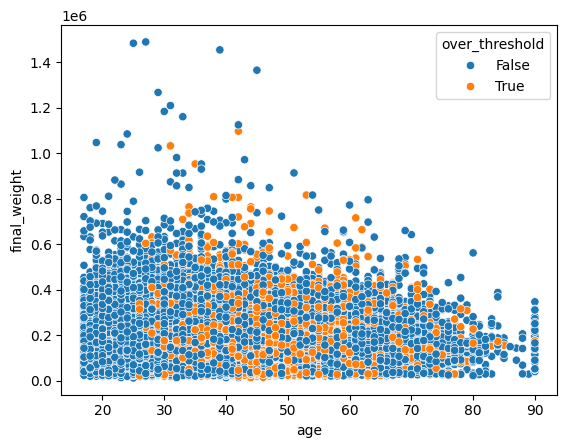

In [375]:
seaborn.scatterplot(data=dataset, x="age", y="final_weight", hue="over_threshold")

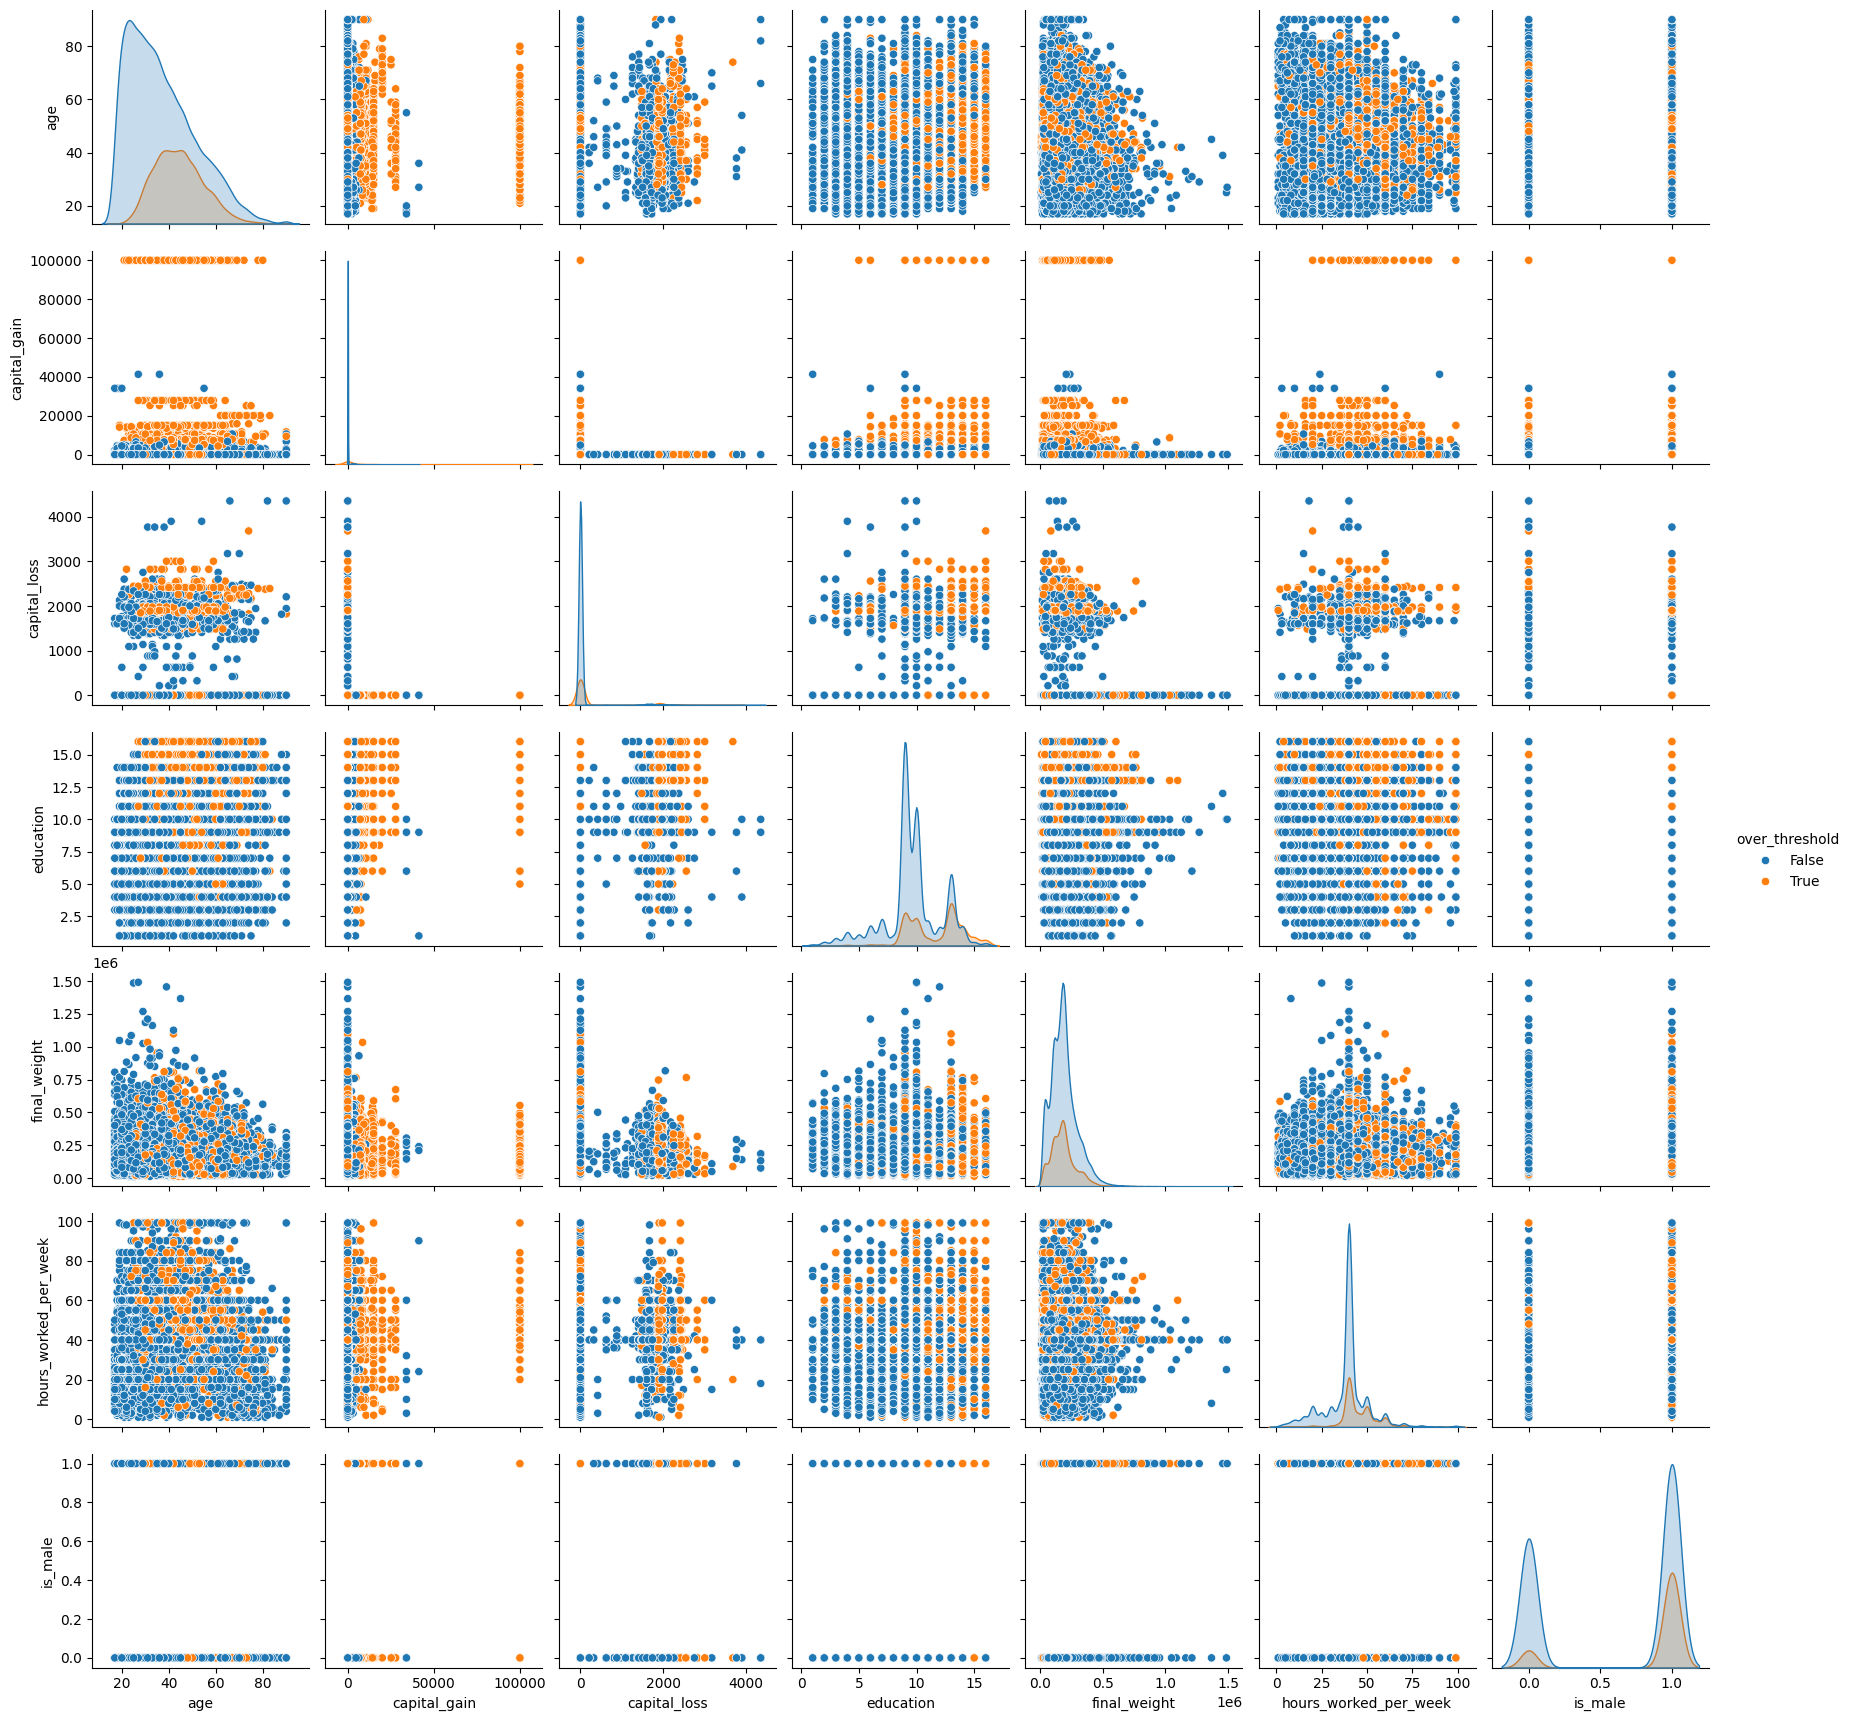

In [376]:
seaborn.pairplot(dataset, hue="over_threshold")

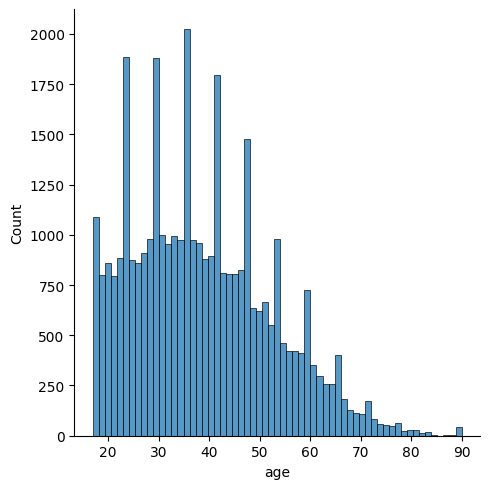

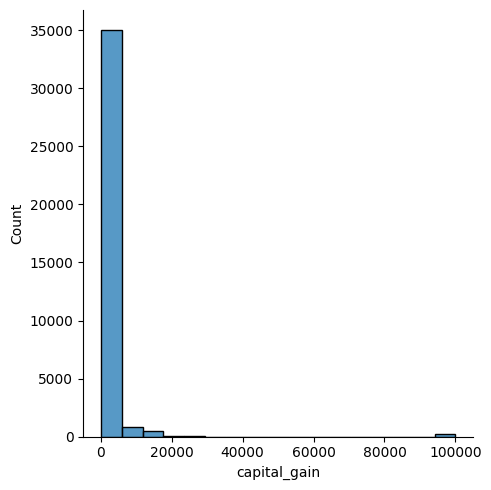

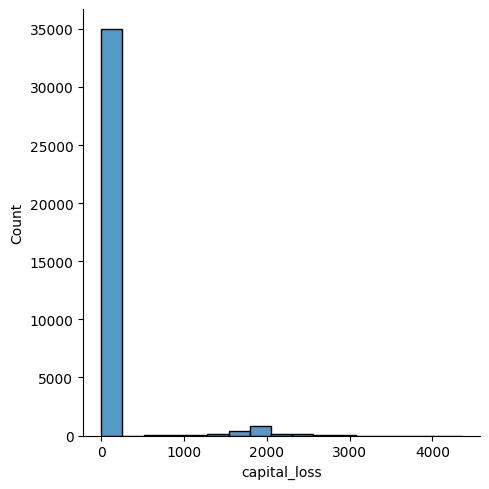

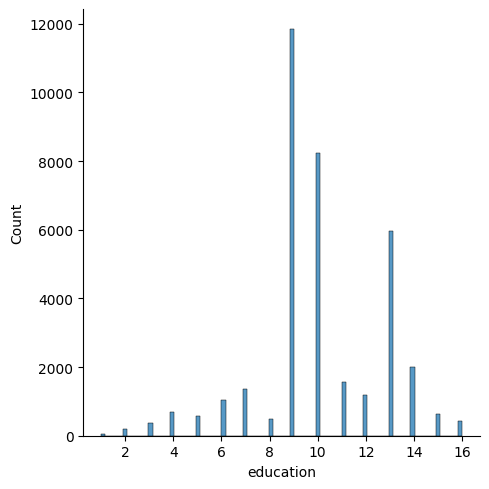

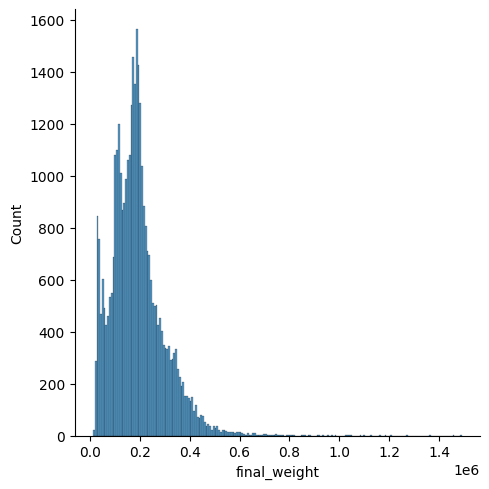

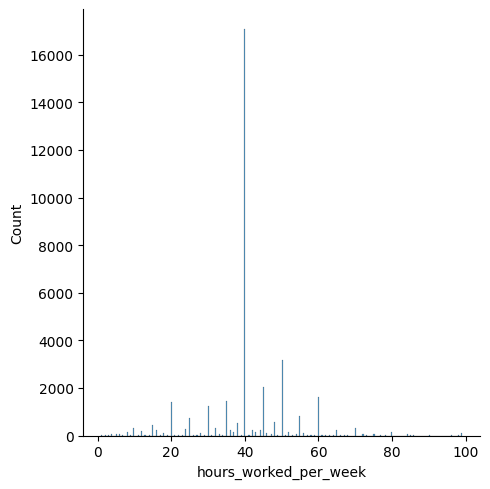

In [377]:
for feature in dataset.select_dtypes(include="number").columns: 
    seaborn.displot(dataset, x=feature)

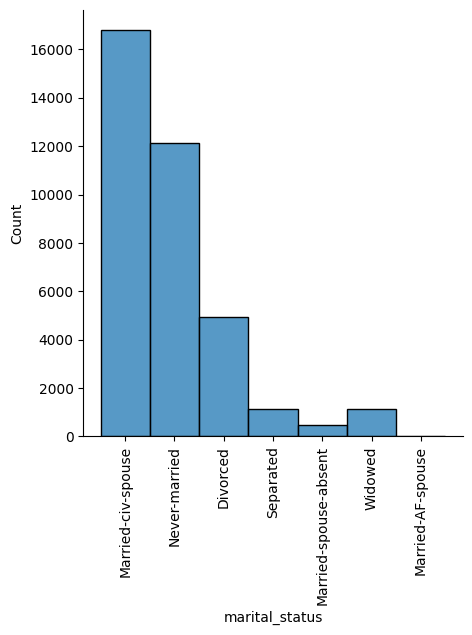

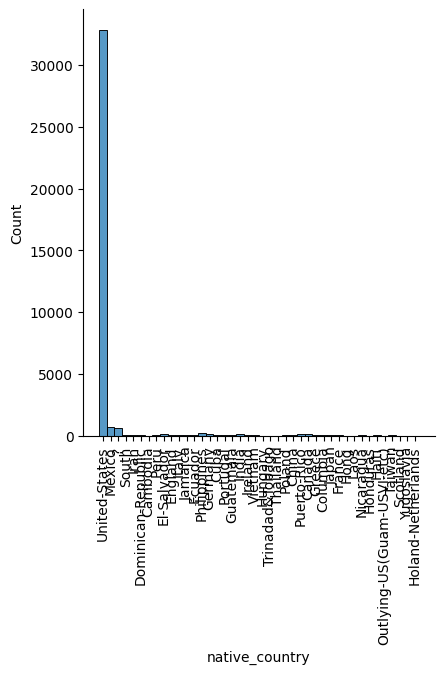

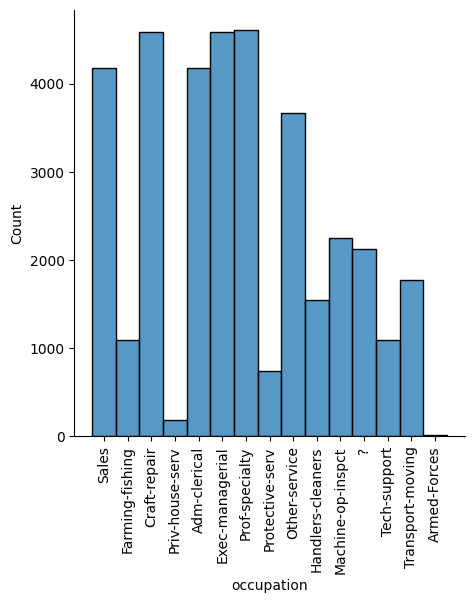

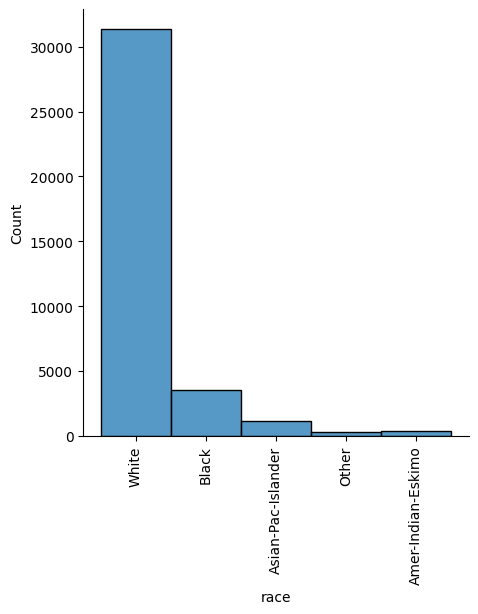

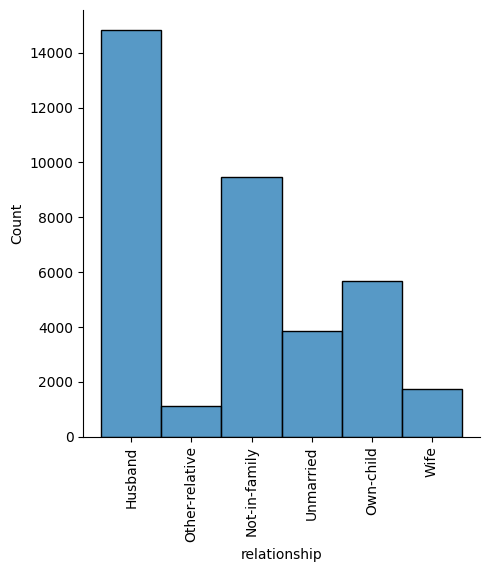

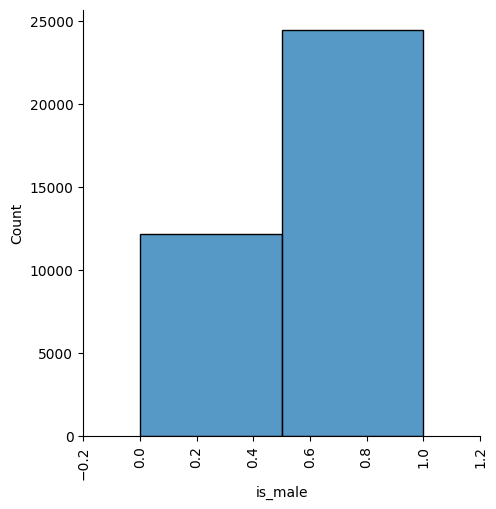

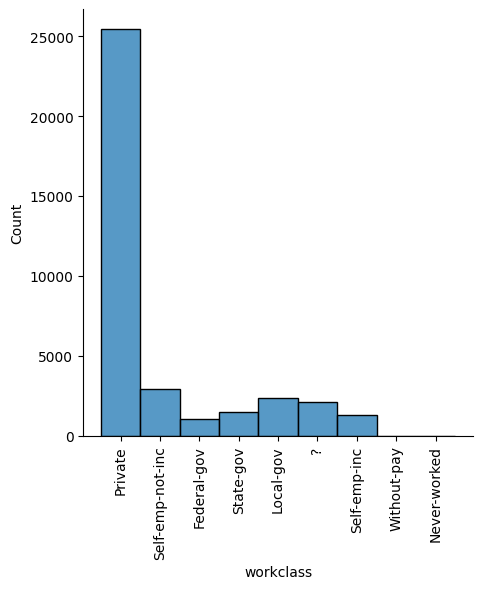

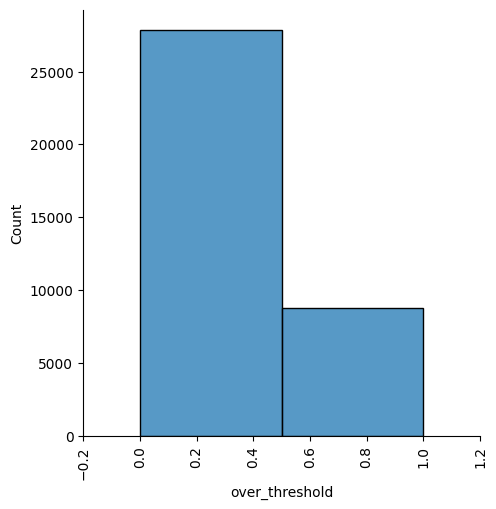

In [378]:
for feature in dataset.select_dtypes(exclude="number").columns:
    g = seaborn.displot(dataset, x=feature,
                        kind="hist",
                        row_order="desc",
                        bins=dataset[feature].unique().size)
    g.set_xticklabels(rotation=90)

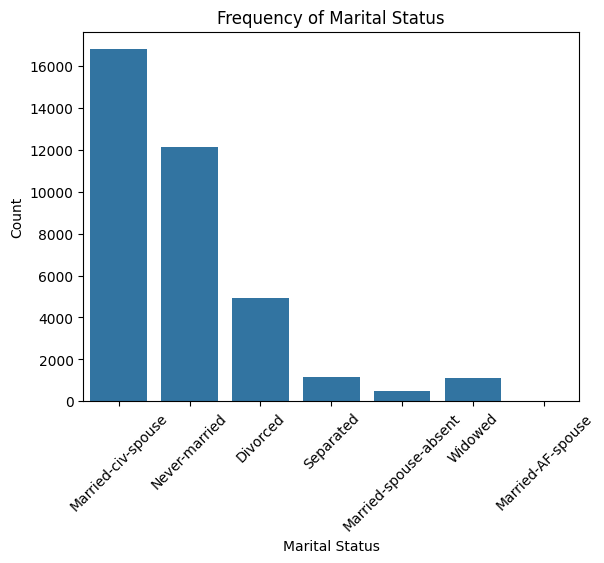

In [379]:
seaborn.countplot(x='marital_status', data=dataset)

plt.title('Frequency of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Rather than point-wise distributions, let us study the distributions *quantile-wise*.

# Boxplot

,age,capital_gain,capital_loss,education,final_weight,hours_worked_per_week
0,0.315787,-0.145101,-0.214779,-0.030794,-1.469763,-0.437643
1,-1.140775,-0.145101,-0.214779,-2.759206,0.517726,-0.437643
2,0.024474,-0.145101,-0.214779,-0.030794,-0.676279,-0.034244
3,-0.266838,-0.145101,-0.214779,-0.420567,-0.597042,0.449833
4,1.990833,-0.145101,-0.214779,1.138526,-1.525595,4.725855


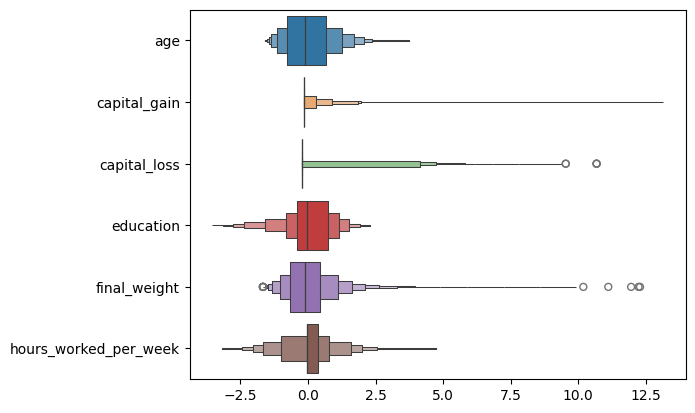

In [401]:
dataset = load_dataset("mstz/adult", "income")["train"].to_pandas()
dataset['over_threshold'] = dataset['over_threshold'].astype(bool)
normalized_dataset, normalization_scalers_dataset = center_and_scale(dataset)

seaborn.boxenplot(normalized_dataset, orient="h")
normalized_dataset.head()

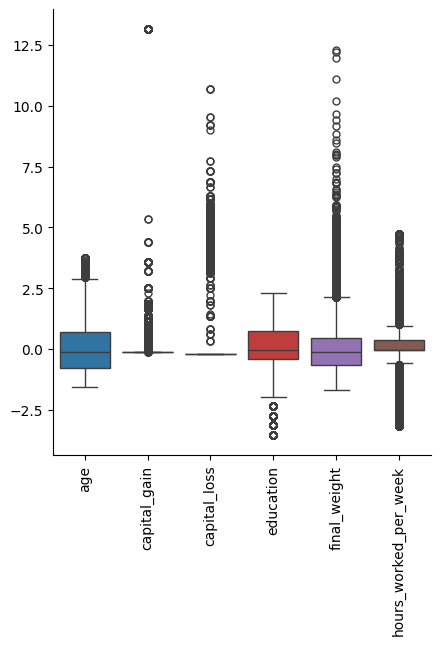

In [402]:
g = seaborn.catplot(normalized_dataset, kind="box")
g.set_xticklabels(rotation=90)

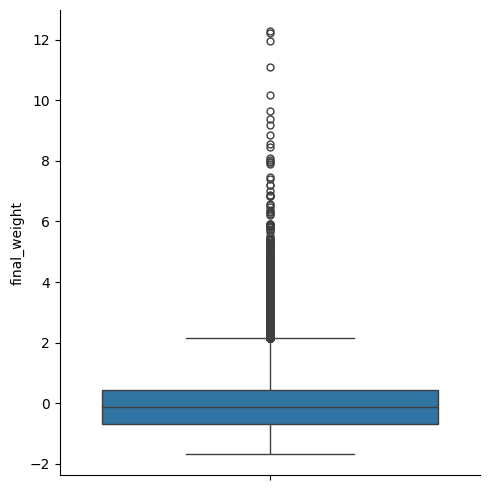

In [403]:
seaborn.catplot(normalized_dataset["final_weight"], kind="box")

In [413]:
normalized_dataset

,age,capital_gain,capital_loss,education,final_weight,hours_worked_per_week
0,0.315787,-0.145101,-0.214779,-0.030794,-1.469763,-0.437643
1,-1.140775,-0.145101,-0.214779,-2.759206,0.517726,-0.437643
2,0.024474,-0.145101,-0.214779,-0.030794,-0.676279,-0.034244
3,-0.266838,-0.145101,-0.214779,-0.420567,-0.597042,0.449833
4,1.990833,-0.145101,-0.214779,1.138526,-1.525595,4.725855
...,...,...,...,...,...,...
36626,0.097302,-0.145101,-0.214779,-0.030794,0.848133,0.369154
36627,0.097302,-0.145101,-0.214779,-0.030794,1.264777,-0.034244
36628,-0.048354,-0.145101,-0.214779,-0.030794,-1.054461,-0.034244
36629,1.044068,-0.145101,-0.214779,1.528299,-0.919222,-0.034244


<Axes: title={'center': 'final_weight'}, xlabel='over_threshold'>

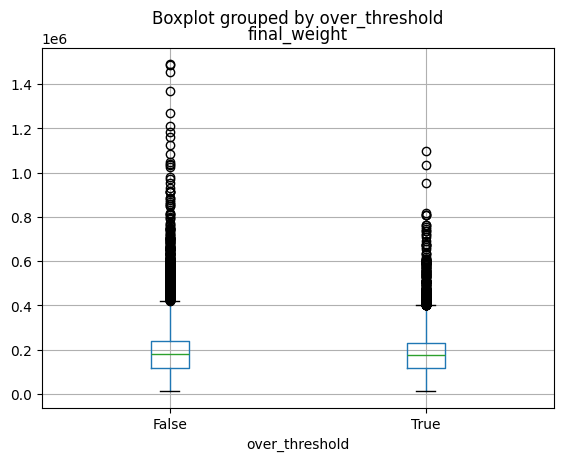

In [410]:
dataset.boxplot(column=['final_weight'], by='over_threshold')

---

# Feature engineering

To understand (and deal with) data, it is often useful to reason in terms of categories, rather than numerical values. E.g.,:
- categorize workers through their weekly hour total
- categorize workers through their capital gain
- ...

This is the *first* component of feature engineering: engineering for understanding.

In [385]:
# dataset = load_dataset("mstz/adult", "income")["train"].to_pandas()

In [386]:
# categorizing workers
dataset.loc[dataset.hours_worked_per_week < 50, "time"] = "regular"
dataset.loc[(dataset.hours_worked_per_week > 50) & (dataset.hours_worked_per_week < 75), "time"] = "overtime"
dataset.loc[(dataset.hours_worked_per_week >= 75) & (dataset.hours_worked_per_week < 90), "time"] = "workaholic"
dataset.loc[dataset.hours_worked_per_week > 90, "time"] = "burnt"

In [387]:
dataset.loc[dataset.capital_gain < 3000, "capital_gain_rank"] = 0
dataset.loc[(dataset.capital_gain > 3000) & (dataset.capital_gain < 5500), "capital_gain_rank"] = 1
dataset.loc[(dataset.capital_gain >= 5500) & (dataset.capital_gain < 10000), "capital_gain_rank"] = 2
dataset.loc[dataset.capital_gain > 10000, "capital_gain_rank"] = 3

---

# Crossing
*[Reference](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)*.

`pandas` allows us to cross information by offering frequencies along every Carthesian combination of two variables.

In [388]:
from pandas import crosstab


# for ease of reading
dataset = dataset.astype({"over_threshold": bool})
crosstab(dataset["age"], dataset["over_threshold"])

over_threshold,False,True
age,,
17,450,0
18,638,0
19,795,3
20,861,1
21,793,4
...,...,...
86,1,0
87,2,0
88,5,0


<Axes: title={'center': 'Frequencies of high pay for different working profiles'}, xlabel='time'>

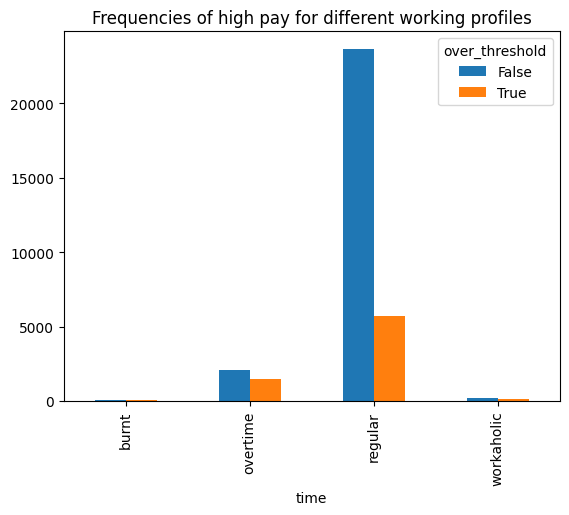

In [389]:
work_hours_by_threshold = crosstab(dataset["time"], dataset["over_threshold"])
work_hours_by_threshold.plot(kind="bar", title="Frequencies of high pay for different working profiles")

**Observation** People working more than the regular amount tend to have better rate of pay. Still, this does not guarantee a high pay.

<Axes: title={'center': 'Frequencies of capital gain for different working profiles'}, xlabel='time'>

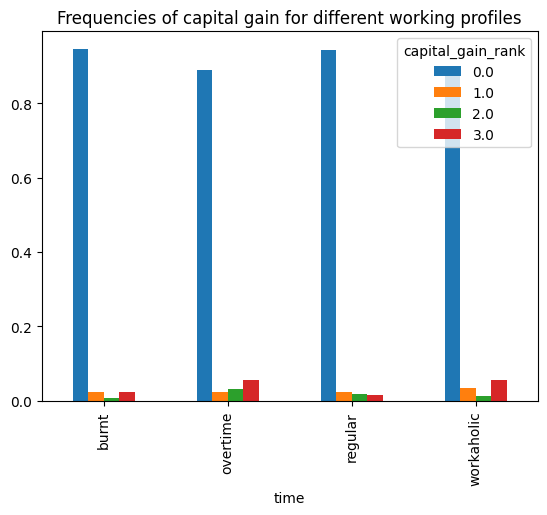

In [390]:
work_hours_by_capital_gain = crosstab(dataset["time"], dataset["capital_gain_rank"]).astype("float")
work_hours_by_capital_gain.loc["burnt", :] = work_hours_by_capital_gain.loc["burnt", :] / work_hours_by_capital_gain.loc["burnt", :].sum()
work_hours_by_capital_gain.loc["regular", :] = work_hours_by_capital_gain.loc["regular", :] / work_hours_by_capital_gain.loc["regular", :].sum()
work_hours_by_capital_gain.loc["overtime", :] = work_hours_by_capital_gain.loc["overtime", :] / work_hours_by_capital_gain.loc["overtime", :].sum()
work_hours_by_capital_gain.loc["workaholic", :] = work_hours_by_capital_gain.loc["workaholic", :] / work_hours_by_capital_gain.loc["workaholic", :].sum()

work_hours_by_capital_gain.plot(kind="bar", title="Frequencies of capital gain for different working profiles")

**Observation** A high capital gain is far from guaranteed regardless of the number of hours worked.

<Axes: title={'center': 'Normalized frequencies of high pay for different working profiles'}, xlabel='time'>

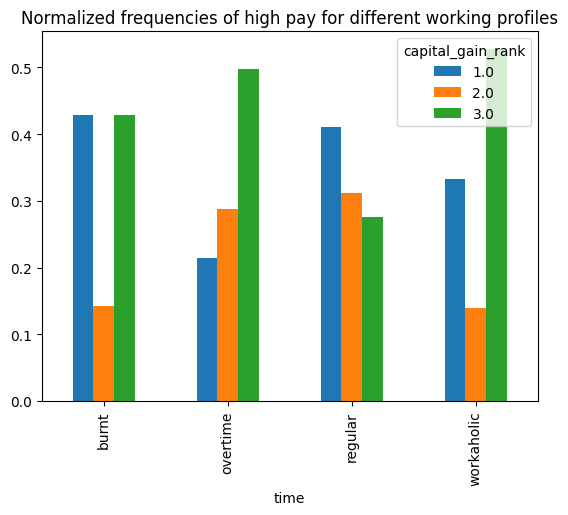

In [391]:
high_earners = dataset[dataset["capital_gain_rank"] > 0]

work_hours_by_capital_gain = crosstab(high_earners["time"], high_earners["capital_gain_rank"]).astype("float")
work_hours_by_capital_gain.loc["burnt", :] = work_hours_by_capital_gain.loc["burnt", :] / work_hours_by_capital_gain.loc["burnt", :].sum()
work_hours_by_capital_gain.loc["regular", :] = work_hours_by_capital_gain.loc["regular", :] / work_hours_by_capital_gain.loc["regular", :].sum()
work_hours_by_capital_gain.loc["overtime", :] = work_hours_by_capital_gain.loc["overtime", :] / work_hours_by_capital_gain.loc["overtime", :].sum()
work_hours_by_capital_gain.loc["workaholic", :] = work_hours_by_capital_gain.loc["workaholic", :] / work_hours_by_capital_gain.loc["workaholic", :].sum()

work_hours_by_capital_gain.plot(kind="bar", title="Normalized frequencies of high pay for different working profiles")

**Observation** Becoming a workaholic from being an overtime worker does not significantly increase your probability of gaining capital.

<Axes: title={'center': 'Frequencies of high pay for different occupations'}, ylabel='occupation'>

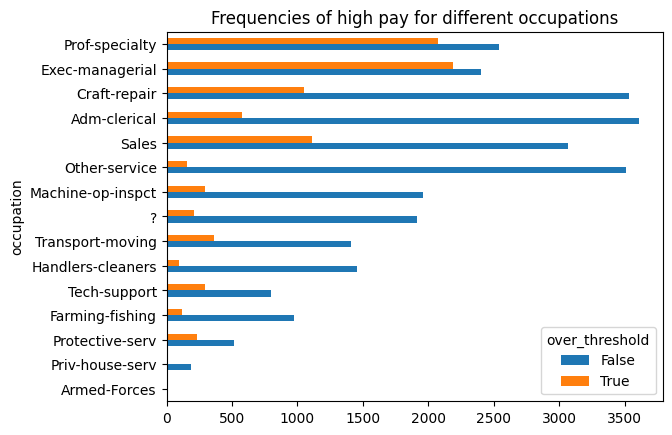

In [392]:
occupation_VS_threshold = crosstab(dataset["occupation"], dataset["over_threshold"])
# sort by occupations with most workers by summing frequencies
sort_index = occupation_VS_threshold.sum(axis="columns").sort_values().index

occupation_VS_threshold.loc[sort_index].plot(kind="barh", title="Frequencies of high pay for different occupations")

**Observation** Some occupations are far more likely than others to provide a high pay.

Cross-tabulations can also be directly visualized on `seaborn` ([Reference](https://seaborn.pydata.org/generated/seaborn.displot.html)).

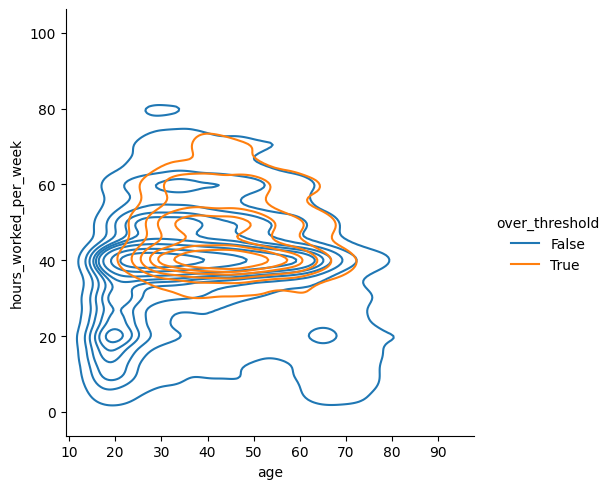

In [393]:
seaborn.displot(
    dataset,
    x="age",
    y="hours_worked_per_week",
    hue="over_threshold",
    kind="kde"
)

## Cross-tabulating, numerically
*[Reference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)*


The above analyses on groups can also be computed directly with a `groupby`.

In [394]:
dataset.groupby(["native_country", "capital_gain_rank"]).describe()

age                                     \
                                  count       mean        std   min    25%   
native_country capital_gain_rank                                             
?              0.0                606.0  38.141914  12.515762  17.0  28.00   
               1.0                  8.0  40.125000   9.478359  29.0  33.25   
               2.0                 20.0  46.350000  10.209773  34.0  38.00   
               3.0                 23.0  47.000000  10.591592  30.0  41.00   
Cambodia       0.0                 18.0  33.944444   7.779855  25.0  28.00   
...                                 ...        ...        ...   ...    ...   
Vietnam        1.0                  3.0  47.333333   9.073772  37.0  44.00   
               3.0                  1.0  23.000000        NaN  23.0  23.00   
Yugoslavia     0.0                 10.0  37.200000  12.318008  19.0  29.25   
               1.0                  2.0  53.000000   2.828427  51.0  52.00   
               2.0                  1.0  66.000000        NaN  66.0  66.00   

                                                    capital_gain  \
                                   50%    75%   max        count   
native_country capital_gain_rank                                   
?              0.0                36.0  45.00  88.0        606.0   
               1.0                37.5  47.75  55.0          8.0   
               2.0                45.5  54.00  66.0         20.0   
               3.0                45.0  51.00  66.0         23.0   
Cambodia       0.0                32.5  37.00  51.0         18.0   
...                                ...    ...   ...          ...   
Vietnam        1.0                51.0  52.50  54.0          3.0   
               3.0                23.0  23.00  23.0          1.0   
Yugoslavia     0.0                35.0  47.00  56.0         10.0   
               1.0                53.0  54.00  55.0          2.0   
               2.0                66.0  66.00  66.0          1.0   

                                                ... final_weight            \
                                          mean  ...          75%       max   
native_country capital_gain_rank                ...                          
?              0.0                   44.813531  ...    232616.00  647882.0   
               1.0                 4373.000000  ...    194028.25  319883.0   
               2.0                 7653.400000  ...    223045.50  529216.0   
               3.0                52858.521739  ...    233012.00  506329.0   
Cambodia       0.0                    0.000000  ...    301109.50  355856.0   
...                                        ...  ...          ...       ...   
Vietnam        1.0                 3751.000000  ...    142285.50  147863.0   
               3.0                14344.000000  ...    106957.00  106957.0   
Yugoslavia     0.0                    0.000000  ...    261645.50  406518.0   
               1.0                 3916.500000  ...    174767.00  179479.0   
               2.0                 5556.000000  ...    142624.00  142624.0   

                                 hours_worked_per_week                        \
                                                 count       mean        std   
native_country capital_gain_rank                                               
?              0.0                               606.0  41.074257  12.028180   
               1.0                                 8.0  41.875000  21.033562   
               2.0                                20.0  42.350000  11.127373   
               3.0                                23.0  46.086957  10.219914   
Cambodia       0.0                                18.0  43.055556   8.425956   
...                                                ...        ...        ...   
Vietnam        1.0                                 3.0  67.000000  23.643181   
               3.0                                 1.0  40.000000        NaN   
Yugoslavia     0.

In [395]:
dataset.groupby("capital_gain_rank").describe()

age                                                \
                     count       mean        std   min   25%   50%   75%   
capital_gain_rank                                                          
0.0                34125.0  38.252777  13.781958  17.0  27.0  36.0  47.0   
1.0                  873.0  41.712486  11.487170  18.0  33.0  40.0  50.0   
2.0                  775.0  44.689032  11.141100  21.0  36.0  43.0  51.0   
3.0                  858.0  46.473193  11.799268  17.0  38.0  46.0  53.0   

                        capital_gain                ... final_weight  \
                    max        count          mean  ...          75%   
capital_gain_rank                                   ...                
0.0                90.0      34125.0     31.772278  ...    237525.00   
1.0                78.0        873.0   4162.324170  ...    241998.00   
2.0                90.0        775.0   7569.163871  ...    229757.50   
3.0                90.0        858.0  34276.307692  ...    231537.25   

                             hours_worked_per_week                             \
                         max                 count       mean        std  min   
capital_gain_rank                                                               
0.0                1490400.0               34125.0  40.105260  12.417391  1.0   
1.0                 764638.0                 873.0  42.649485  10.809906  3.0   
2.0                1033222.0                 775.0  44.745806   9.951363  6.0   
3.0                 673764.0                 858.0  46.952214  12.247784  2.0   

                                           
                    25%   50%   75%   max  
capital_gain_rank                          
0.0                40.0  40.0  45.0  99.0  
1.0                40.0  40.0  45.0  99.0  
2.0                40.0  40.0  50.0  96.0  
3.0                40.0  45.0  55.0  99.0  

[4 rows x 48 columns]